In [1]:
from pandas import read_csv
filename = 'dataset//cost_of_living/cost_of_living.csv'
df_cost_of_living = read_csv(filename).dropna()
df_cost_of_living = df_cost_of_living.set_index('Country')
df_cost_of_living.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,
Argentina,1287.8540,1567.5980,1938.3650,1862.0585,2003.9330,2250.2455,2134.153345,2162.854675,1849.572275,1547.585985,1452.587395
Australia,2305.9525,3402.0115,3497.3400,3617.9805,3505.2375,3031.5370,3015.473135,3013.260195,3130.170875,3015.915325,3040.482315
Austria,2098.4985,2771.5665,2395.3730,2474.1160,2535.7345,2414.0015,2746.560665,2763.594395,2905.729440,2807.800890,2729.592825
Belgium,2467.6735,3089.2735,2618.6360,2807.0555,3031.6935,2755.3645,2950.407795,2784.550510,3020.484075,2876.052530,2982.126965
Bosnia And Herzegovina,1201.1620,1351.2165,1291.5925,1350.1585,1383.9850,1215.0130,1374.416230,1362.515830,1456.123765,1488.702065,1457.564550


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cost of living - compare countries

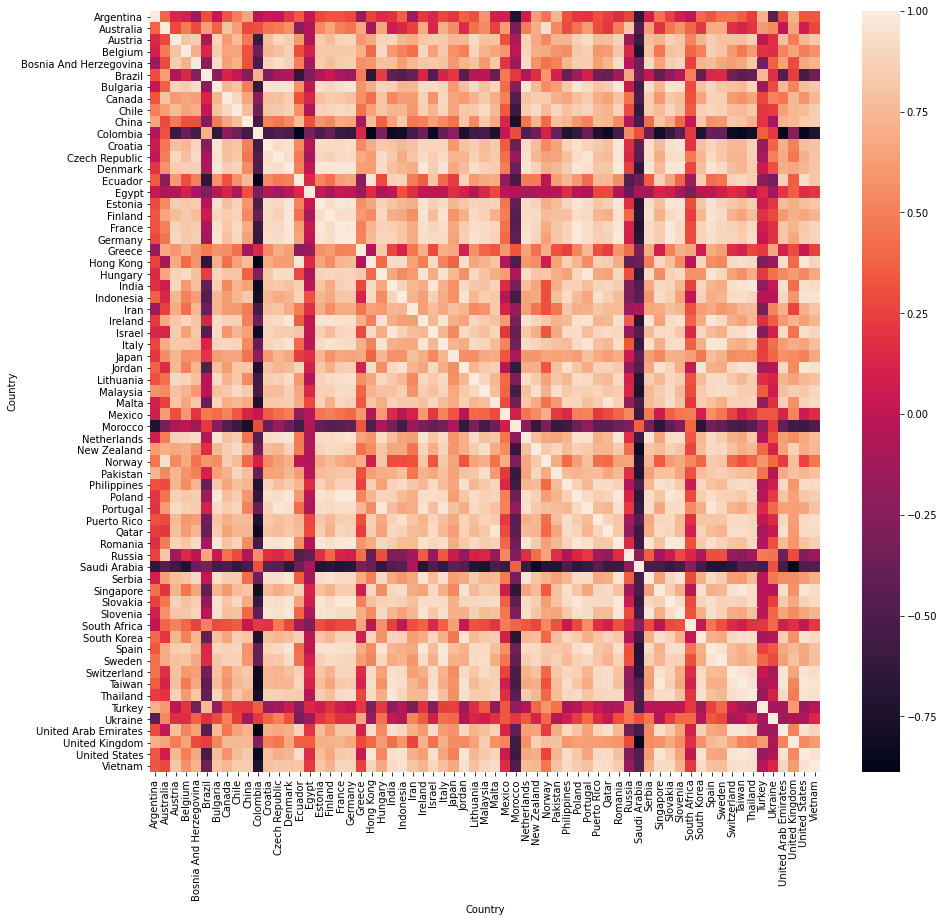

In [3]:
corr = df_cost_of_living.T.corr(method='pearson')

fig, plot = plt.subplots(figsize = (15,14))
plot = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Real wealth

In [4]:
filename = 'dataset//wealth_factor/wealth.csv'
df_real_wealth = read_csv(filename).dropna()
df_real_wealth = df_real_wealth.filter(items=['Country', 'Field', 'Year', 'Wealth Factor'])
df_real_wealth.head()

,Country,Field,Year,Wealth Factor
0,Argentina,Total,2010,0.481980
1,Argentina,"A. Agriculture, hunting and forestry",2010,0.429730
2,Argentina,B. Fishing,2010,0.758525
3,Argentina,C. Mining and quarrying,2010,1.223772
4,Argentina,D. Manufacturing,2010,0.532094


In [5]:
def get_field_type(dataframe, field_name):
    return dataframe[(dataframe['Field'] == field_name)] 

In [6]:
def get_country_data(dataframe, country_name):
    dataframe_for_country = dataframe[(dataframe['Country'] == country_name)] 
    dataframe_for_country = dataframe_for_country.filter(items=['Year', 'Wealth Factor'])
    dataframe_for_country = dataframe_for_country.set_index('Year')
    dataframe_for_country = dataframe_for_country.T
    dataframe_for_country['Country'] = country_name
    
    return dataframe_for_country

In [7]:
df_real_wealth_total = get_field_type(df_real_wealth, 'Total')

In [8]:
from pandas import DataFrame

In [9]:
df_real_wealth_total_structured = DataFrame()

for country_name in df_real_wealth_total.Country.unique():
    if country_name != 'Canada':
        new_row = get_country_data(df_real_wealth_total, country_name)
        df_real_wealth_total_structured = df_real_wealth_total_structured.append(new_row)

df_real_wealth_total_structured.pop(2020)
pass

In [10]:
df_real_wealth_total_structured = df_real_wealth_total_structured.dropna()
df_real_wealth_total_structured = df_real_wealth_total_structured.set_index('Country')

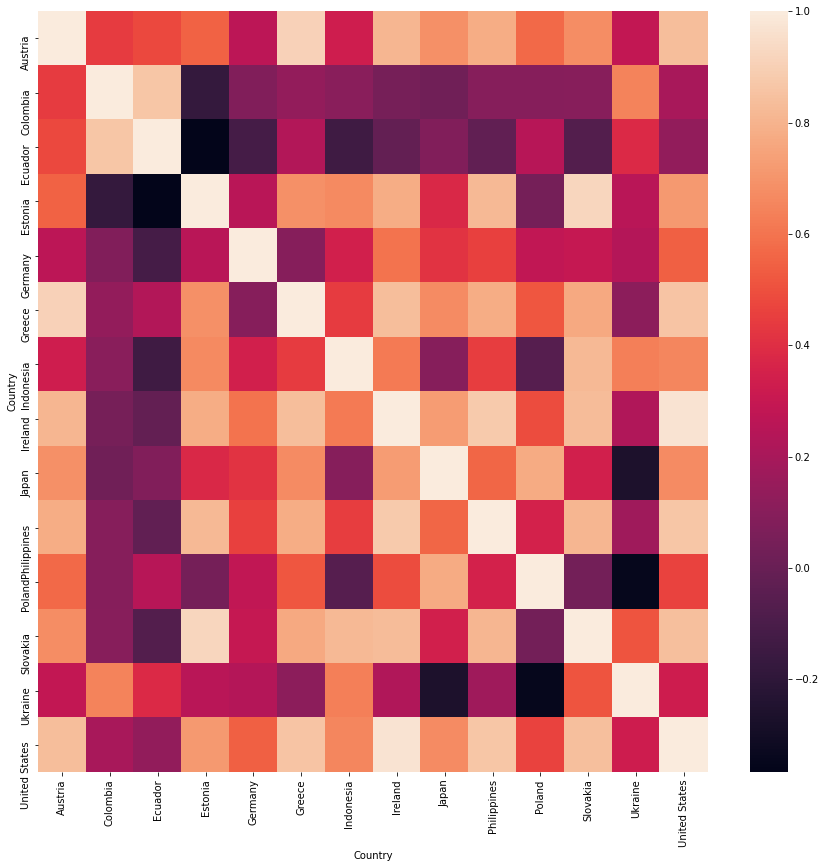

In [11]:
corr_real_wealth_total = df_real_wealth_total_structured.T.corr(method='pearson')

fig, plot = plt.subplots(figsize = (15,14))
plot = sns.heatmap(corr_real_wealth_total, 
        xticklabels=corr_real_wealth_total.columns,
        yticklabels=corr_real_wealth_total.columns)

# Real wealth for 2019

In [12]:
df_real_wealth_2019 = df_real_wealth[(df_real_wealth['Year'] == 2019)]
df_real_wealth_2019.pop('Year')
pass

In [13]:
df_real_wealth_2019.head()

,Country,Field,Wealth Factor
8916,Albania,Total,0.323239
8917,Albania,A. Agriculture; forestry and fishing,0.227778
8918,Albania,B. Mining and quarrying,0.520573
8919,Albania,C. Manufacturing,0.224199
8920,Albania,"D. Electricity; gas, steam and air conditionin...",0.473765


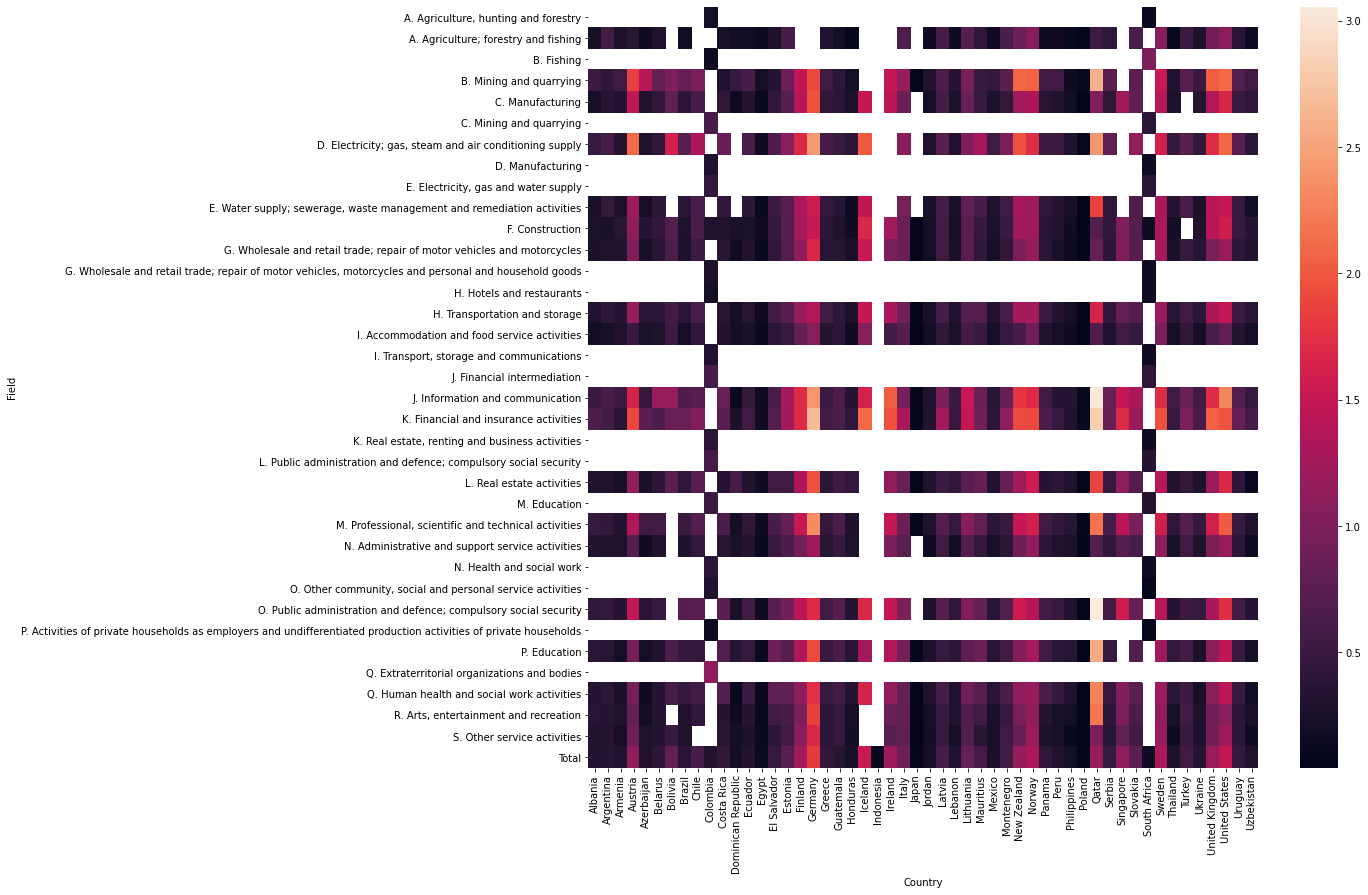

In [14]:
df_real_wealth_2019 = df_real_wealth_2019[(df_real_wealth_2019['Country'] != 'Canada')]
table = df_real_wealth_2019.pivot('Field', 'Country', 'Wealth Factor')

fig, plot = plt.subplots(figsize = (15,14))
plot = sns.heatmap(table)